In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.set_printoptions(threshold=np.nan)
import pandas as pd
import string

# Data Loading

In [2]:
df = pd.read_csv('/Users/bowen/Desktop/H/Data/data_subset.csv')
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df['timestemp'] = df['year'].astype(str)+'-'+df['month'].astype(str)
df['timestemp'] = pd.to_datetime(df['timestemp'])
df.set_index('timestemp', inplace = True)
df.drop(['active', 'year', 'month', 'date'], axis=1, inplace = True)

df['volume_monthly'] = df['csho_1yr_avg'] / 4
df['EBIT'] = df['saleq_ttm'] - df['cogsq_ttm'] - df['xsgaq_ttm']
df['EBIT/EV'] = df['EBIT'] / df['entval']

df['indicator'] = df['EBIT/EV'].shift(periods = -12)

df.drop(['gics-sector', 'mom1m', 'mom3m', 'mom6m', 'mom9m', 'mrkcap',
       'entval', 'saleq_ttm', 'cogsq_ttm', 'xsgaq_ttm', 'oiadpq_ttm',
       'niq_ttm', 'cheq_mrq', 'rectq_mrq', 'invtq_mrq', 'acoq_mrq',
       'ppentq_mrq', 'aoq_mrq', 'dlcq_mrq', 'apq_mrq', 'txpq_mrq', 'lcoq_mrq',
       'ltq_mrq', 'seqq_mrq', 'atq_mrq', 'csho_1yr_avg',
       'prccm', 'ajexm', 'EBIT', 'EBIT/EV'], axis=1, inplace=True)

In [4]:
df = df[df.index >datetime(2001,1,1)]
df = df.pivot(columns = 'gvkey', values = ['adjusted_price','indicator','volume_monthly'])
df = df.bfill()
df = df.ffill()

In [11]:
dfPrice = df['adjusted_price']
goodStock = list()
for ticker in dfPrice.columns.values:
    stock = dfPrice[ticker]
    pt = dfPrice[ticker].pct_change()[1:].tolist()
    ptchec = [i for i in pt if abs(i)<0.5]
    if len(pt) == len(ptchec):
        if ticker not in set(goodStock):
            goodStock.append(ticker)
len(goodStock)

644

# Backtesting

In [31]:
from backTesting import algo2

In [32]:
periods = len(df)
prices = df['adjusted_price'][goodStock].values
indicators = df['indicator'][goodStock].values
volume_monthly = df['volume_monthly'][goodStock].values * 1000000
tickers = df['volume_monthly'][goodStock].columns.values

In [33]:
mm = algo2(prices[0, :], indicators[0, :], volume_monthly[0, :], len(tickers), tickers)

In [34]:
for i in range(1, periods):
    print(mm.avail_capital)
    mm.process_new_data(prices[i, :], indicators[i, :], volume_monthly[i, :])

83.84287036955357
83.84287036955357
83.84287036955357
83.84287036955357
83.84287036955357
83.84287036955357
83.84287036955357
83.84287036955357
83.84287036955357
83.84287036955357
83.84287036955357
83.84287036955357
Month12 stock 7762 avaliable capital is 8394427.737870371, the volums is 1719437.499999998
Month12 stock 13709 avaliable capital is 17534364.96787037, the volums is 11808749.999999998
Month12 stock 7017 avaliable capital is 27779245.87787037, the volums is 77234895.83333334
Month12 stock 6512 avaliable capital is 33208054.26787037, the volums is 47265749.99999985
Month12 stock 5667 avaliable capital is 55559163.14387037, the volums is 2572499.999999999
Month12 stock 14934 avaliable capital is 62347474.943870366, the volums is 31427354.166666646
38.26387036219239
38.26387036219239
Month14 stock 31460 avaliable capital is 13594399.743390363, the volums is 6458687.499999996
6.1233903635293245
6.1233903635293245
6.1233903635293245
6.1233903635293245
6.1233903635293245
6.1233903

32.96614668518305
32.96614668518305
Month168 stock 2573 avaliable capital is 2207908.860746685, the volums is 894999.9999999988
6.679496685042977
6.679496685042977
Month170 stock 7620 avaliable capital is 3814003.8494966854, the volums is 44751791.66666667
26.43949668528512
26.43949668528512
26.43949668528512
Month173 stock 13323 avaliable capital is 13826424.039496684, the volums is 5776312.500000008
27.219496682286263
Month174 stock 122915 avaliable capital is 9433212.489496682, the volums is 17749104.16666668
14.983496680855751
14.983496680855751
Month176 stock 29108 avaliable capital is 12680719.51349668, the volums is 36595270.83333333
Month176 stock 7343 avaliable capital is 26408613.70349668, the volums is 268562500.00000006
10.903496680781245
10.903496680781245
10.903496680781245
10.903496680781245
Month180 stock 3806 avaliable capital is 1036331.4534966808, the volums is 4261291.666666668
59.873496680753306
59.873496680753306
Month182 stock 28338 avaliable capital is 1136443.5

In [35]:
mm.StockPosition

{'month0': {'1076': 2007733,
  '13709': 1006277,
  '14934': 364963,
  '2573': 2601626,
  '27914': 836820,
  '31460': 672268,
  '5667': 8888888,
  '6512': 184246,
  '7017': 730994,
  '7762': 297619},
 'month1': {'1076': ('share: 2007733', 'price:4.711111111111111'),
  '13709': ('share: 1006277', 'price:9.788557226290571'),
  '14934': ('share: 364963', 'price:28.5'),
  '2573': ('share: 2601626', 'price:4.0625'),
  '27914': ('share: 836820', 'price:13.5'),
  '31460': ('share: 672268', 'price:17.65'),
  '5667': ('share: 8888888', 'price:1.303125'),
  '6512': ('share: 184246', 'price:45.225'),
  '7017': ('share: 730994', 'price:13.81'),
  '7762': ('share: 297619', 'price:29.75')},
 'month10': {'1076': ('share: 2007733', 'price:4.2518518518518515'),
  '13709': ('share: 1006277', 'price:9.540116687552233'),
  '14934': ('share: 364963', 'price:17.195'),
  '2573': ('share: 2601626', 'price:3.6'),
  '27914': ('share: 836820', 'price:12.58'),
  '31460': ('share: 672268', 'price:12.14'),
  '5667':

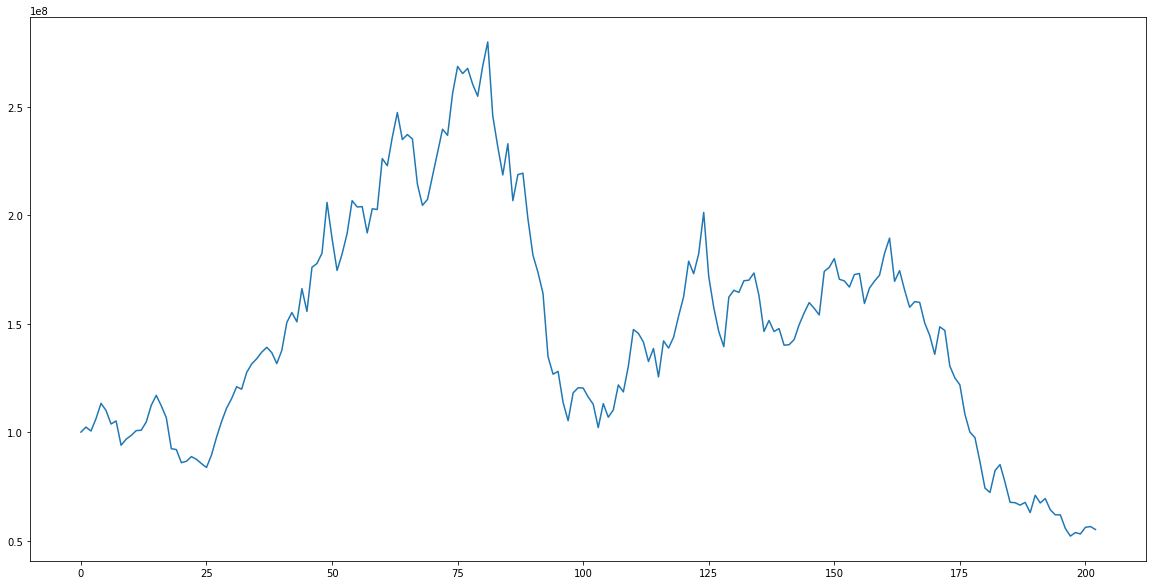

In [36]:
port_val = [i for i in mm.port_value.values()]
plt.figure(figsize=(20,10))
plt.plot(port_val)
plt.show()